In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder


In [46]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/6th sem lab/MLP/HR_comma_sep.csv')

In [61]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,encodedsal,dept
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,7
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2,7
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2,7
3,0.72,0.87,5,223,5,0,1,0,sales,low,1,7
4,0.37,0.52,2,159,3,0,1,0,sales,low,1,7


In [62]:
le=LabelEncoder()
data['encodedsal']=le.fit_transform(data['salary'])

In [63]:
data['dept']=le.fit_transform(data['sales'])

In [69]:
mlp=MLPClassifier(hidden_layer_sizes=(6,5),random_state=5,learning_rate_init=0.01)

In [65]:
X=data.drop(['sales','salary','left'],axis=1)

In [66]:
y=data['left']

In [67]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [70]:
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5)

In [71]:
pred=mlp.predict(X_test)

In [72]:
testX = [[0.37,0.32,2,188,3,0,0,7,0]] 
testpred=mlp.predict(testX)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [73]:
if testpred == 0: 
  print("Employee will stay")
else:
  print("Employee will leave")

Employee will leave


In [74]:
from sklearn.metrics import plot_confusion_matrix
TN, FN, FP, TP=confusion_matrix(y_test,pred).ravel()

In [75]:
confusion_matrix(list(y_test),list(pred),labels=[0,1])

array([[2616,  237],
       [ 118,  779]])

In [76]:
print(TN, FN, FP, TP)

2616 237 118 779


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


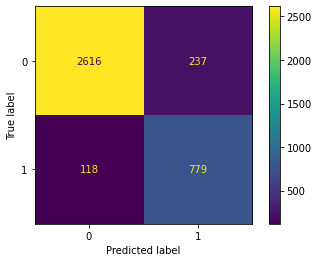

In [77]:
plot_confusion_matrix(mlp, X_test, y_test)  